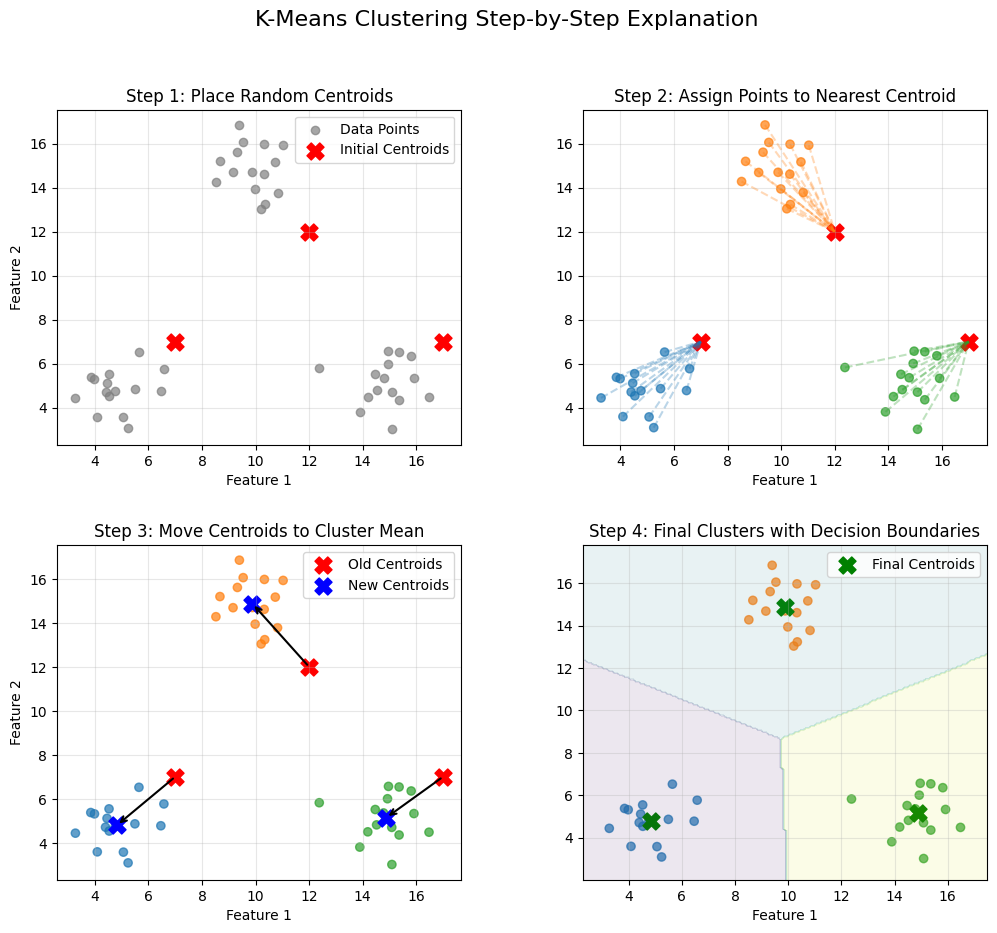

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create more distinct sample data
np.random.seed(42)
cluster1 = np.random.normal(loc=[5, 5], scale=1, size=(15, 2))
cluster2 = np.random.normal(loc=[10, 15], scale=1, size=(15, 2))
cluster3 = np.random.normal(loc=[15, 5], scale=1, size=(15, 2))
X = np.vstack([cluster1, cluster2, cluster3])

# Create a figure with 4 subplots to show each step
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('K-Means Clustering Step-by-Step Explanation', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Step 1: Initial random centroids
axs[0, 0].scatter(X[:, 0], X[:, 1], c='gray', alpha=0.7, label='Data Points')
initial_centroids = np.array([[7, 7], [12, 12], [17, 7]])
axs[0, 0].scatter(initial_centroids[:, 0], initial_centroids[:, 1], 
                 c='red', marker='X', s=150, label='Initial Centroids')
axs[0, 0].set_title('Step 1: Place Random Centroids')
axs[0, 0].set_xlabel('Feature 1')
axs[0, 0].set_ylabel('Feature 2')
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.3)

# Step 2: Assign points to nearest centroid
kmeans = KMeans(n_clusters=3, init=initial_centroids, n_init=1, max_iter=1)
kmeans.fit(X)
labels = kmeans.labels_
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Distinct colors

axs[0, 1].scatter(X[:, 0], X[:, 1], c=[colors[label] for label in labels], alpha=0.7)
axs[0, 1].scatter(initial_centroids[:, 0], initial_centroids[:, 1], 
                 c='red', marker='X', s=150)

# Draw lines from points to centroids
for i, point in enumerate(X):
    centroid = initial_centroids[labels[i]]
    axs[0, 1].plot([point[0], centroid[0]], [point[1], centroid[1]], 
                  c=colors[labels[i]], alpha=0.3, linestyle='--')

axs[0, 1].set_title('Step 2: Assign Points to Nearest Centroid')
axs[0, 1].set_xlabel('Feature 1')
axs[0, 1].grid(alpha=0.3)

# Step 3: Move centroids to cluster means
new_centroids = kmeans.cluster_centers_

axs[1, 0].scatter(X[:, 0], X[:, 1], c=[colors[label] for label in labels], alpha=0.7)
axs[1, 0].scatter(initial_centroids[:, 0], initial_centroids[:, 1], 
                 c='red', marker='X', s=150, label='Old Centroids')
axs[1, 0].scatter(new_centroids[:, 0], new_centroids[:, 1], 
                 c='blue', marker='X', s=150, label='New Centroids')

# Draw arrows showing centroid movement
for i in range(3):
    axs[1, 0].annotate("", xy=new_centroids[i], xytext=initial_centroids[i],
                      arrowprops=dict(arrowstyle="->", color='black', lw=1.5))

axs[1, 0].set_title('Step 3: Move Centroids to Cluster Mean')
axs[1, 0].set_xlabel('Feature 1')
axs[1, 0].set_ylabel('Feature 2')
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.3)

# Step 4: Final clusters after convergence
kmeans = KMeans(n_clusters=3, init=initial_centroids, n_init=1)
kmeans.fit(X)
final_labels = kmeans.labels_
final_centroids = kmeans.cluster_centers_

axs[1, 1].scatter(X[:, 0], X[:, 1], c=[colors[label] for label in final_labels], alpha=0.7)
axs[1, 1].scatter(final_centroids[:, 0], final_centroids[:, 1], 
                 c='green', marker='X', s=150, label='Final Centroids')

# Add cluster boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[1, 1].contourf(xx, yy, Z, alpha=0.1, cmap='viridis')

axs[1, 1].set_title('Step 4: Final Clusters with Decision Boundaries')
axs[1, 1].set_xlabel('Feature 1')
axs[1, 1].grid(alpha=0.3)
axs[1, 1].legend()

plt.show()

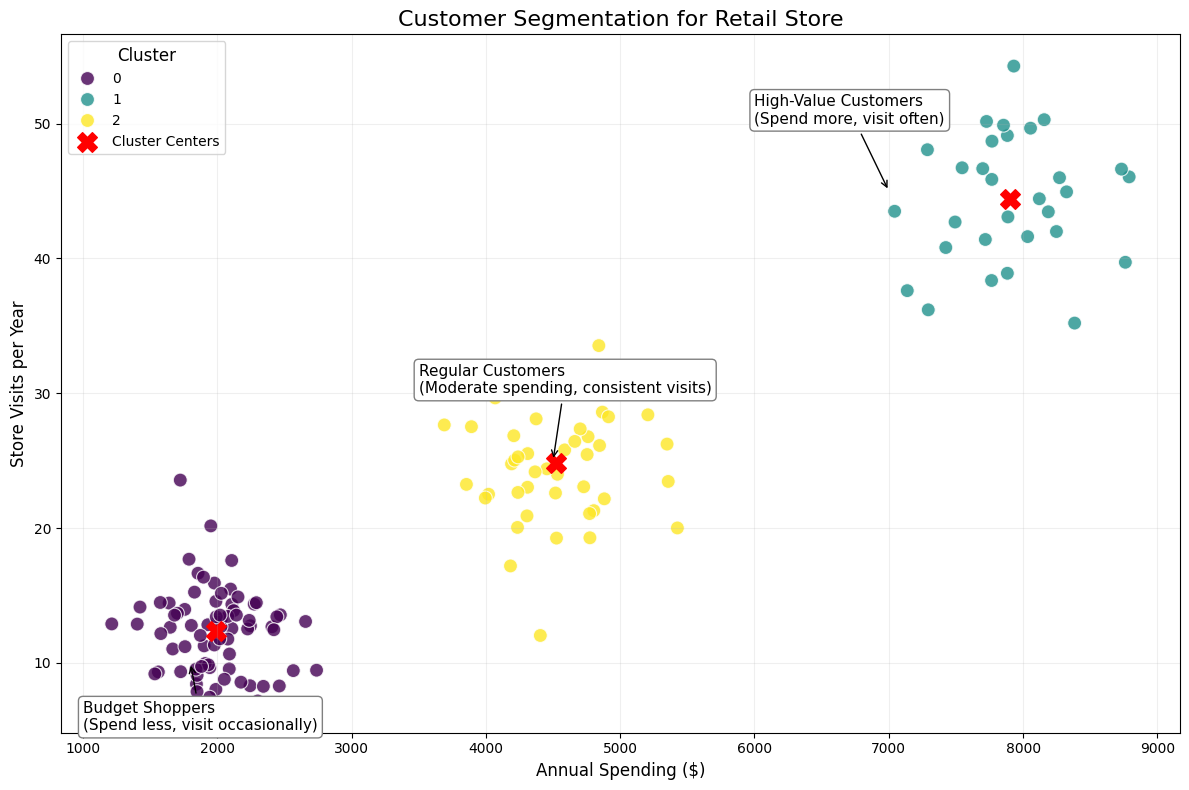


Customer Segment Profiles:
        Annual_Spending                 Visit_Frequency            
                   mean     min     max            mean   min   max
Cluster                                                            
0                1990.0  1214.1  2739.0            12.4   7.2  23.6
1                7905.9  7043.4  8789.6            44.4  35.2  54.3
2                4524.0  3689.9  5425.9            24.8  12.0  33.5

Marketing Recommendations:
• Cluster 0 (Budget Shoppers): Target with discount offers and value deals
• Cluster 1 (High-Value Customers): Offer premium products and loyalty rewards
• Cluster 2 (Regular Customers): Encourage with subscription programs and visit-based rewards


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic customer data (real-world scenario)
# We'll create 3 distinct customer segments:
# 1. High-value frequent shoppers
# 2. Budget occasional shoppers
# 3. Moderate regular shoppers

# Create 150 customers
n_customers = 150

# Segment 1: High-value frequent shoppers (20% of customers)
high_value = pd.DataFrame({
    'Annual_Spending': np.random.normal(8000, 500, int(n_customers*0.2)),
    'Visit_Frequency': np.random.normal(45, 5, int(n_customers*0.2))
})

# Segment 2: Budget occasional shoppers (50% of customers)
budget = pd.DataFrame({
    'Annual_Spending': np.random.normal(2000, 300, int(n_customers*0.5)),
    'Visit_Frequency': np.random.normal(12, 3, int(n_customers*0.5))
})

# Segment 3: Moderate regular shoppers (30% of customers)
moderate = pd.DataFrame({
    'Annual_Spending': np.random.normal(4500, 400, int(n_customers*0.3)),
    'Visit_Frequency': np.random.normal(25, 4, int(n_customers*0.3))
})

# Combine all segments
customers = pd.concat([high_value, budget, moderate], ignore_index=True)

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customers)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to original data
customers['Cluster'] = clusters

# Create a beautiful visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customers, x='Annual_Spending', y='Visit_Frequency', 
                hue='Cluster', palette='viridis', s=100, alpha=0.8)

# Plot cluster centers (convert back from scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# Add labels and title
plt.title('Customer Segmentation for Retail Store', fontsize=16)
plt.xlabel('Annual Spending ($)', fontsize=12)
plt.ylabel('Store Visits per Year', fontsize=12)
plt.grid(alpha=0.2)

# Add cluster interpretation annotations
plt.annotate('High-Value Customers\n(Spend more, visit often)', 
             xy=(7000, 45), xytext=(6000, 50),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray"))

plt.annotate('Budget Shoppers\n(Spend less, visit occasionally)', 
             xy=(1800, 10), xytext=(1000, 5),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray"))

plt.annotate('Regular Customers\n(Moderate spending, consistent visits)', 
             xy=(4500, 25), xytext=(3500, 30),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray"))

plt.legend(title='Cluster', title_fontsize=12)
plt.tight_layout()
plt.show()

# Print cluster characteristics
print("\nCustomer Segment Profiles:")
cluster_profiles = customers.groupby('Cluster').agg({
    'Annual_Spending': ['mean', 'min', 'max'],
    'Visit_Frequency': ['mean', 'min', 'max']
}).round(1)

print(cluster_profiles)

# Business Recommendations
print("\nMarketing Recommendations:")
print("• Cluster 0 (Budget Shoppers): Target with discount offers and value deals")
print("• Cluster 1 (High-Value Customers): Offer premium products and loyalty rewards")
print("• Cluster 2 (Regular Customers): Encourage with subscription programs and visit-based rewards")

Dataset Overview:
Number of samples: 150
Number of features: 4
Target classes: ['setosa', 'versicolor', 'virginica']

Feature Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Class Distribution:
species
setosa       

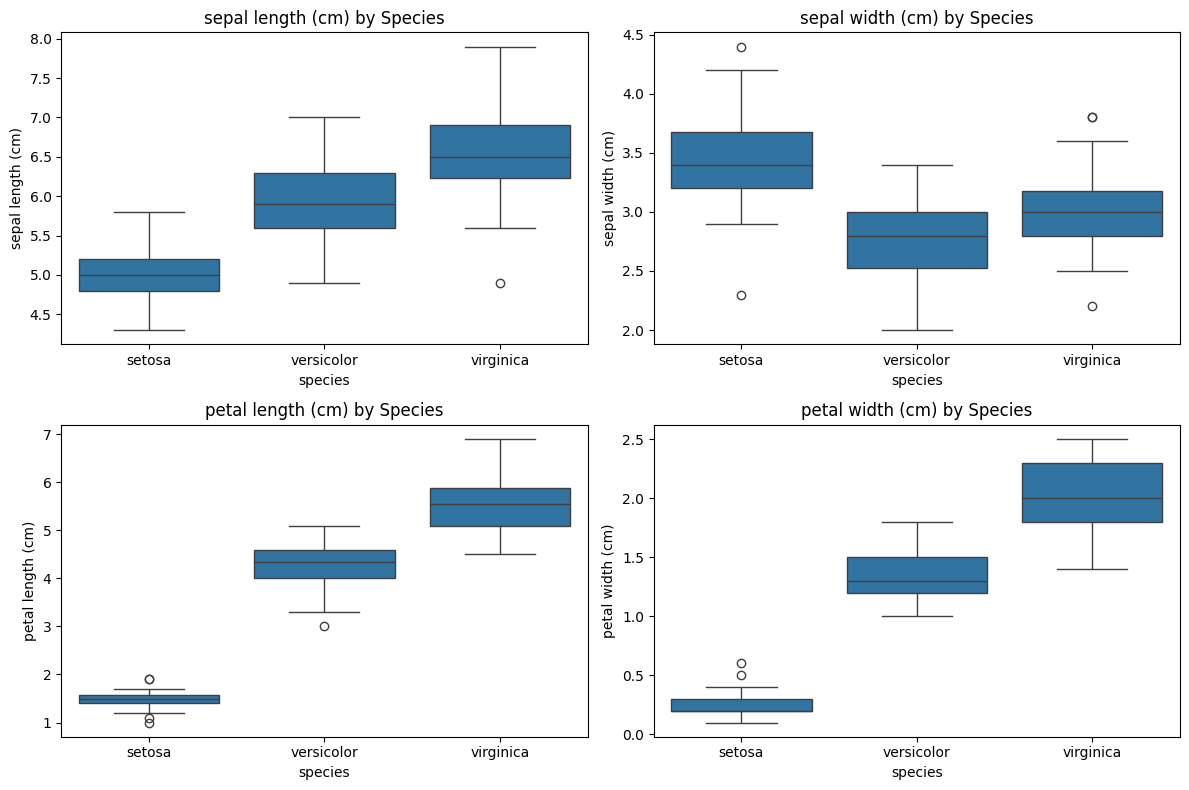

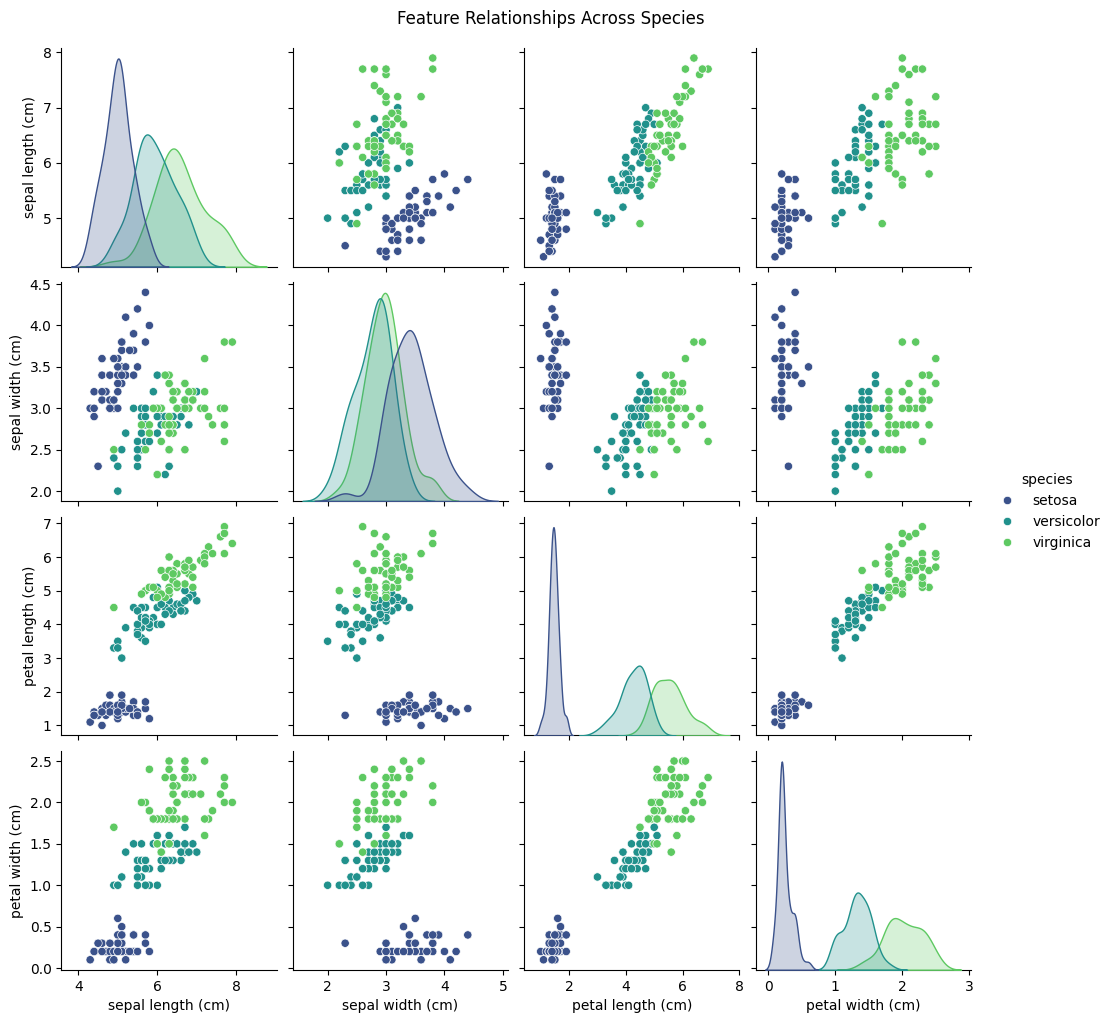

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



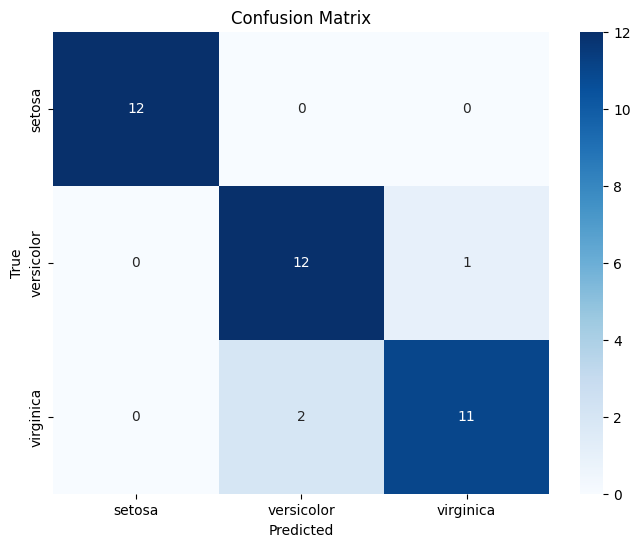

ValueError: X has 2 features, but LogisticRegression is expecting 4 features as input.

<Figure size 1000x800 with 0 Axes>

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# Load the Iris dataset (real-world botanical data)
iris = load_iris()
X = iris.data  # Flower measurements: sepal length/width, petal length/width
y = iris.target  # Flower species (0=setosa, 1=versicolor, 2=virginica)
feature_names = iris.feature_names
target_names = iris.target_names

# Create DataFrame for exploration
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

# Data Exploration
print("="*50)
print("Dataset Overview:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target classes: {target_names.tolist()}")
print("\nFeature Statistics:")
print(df.describe())

print("\nClass Distribution:")
print(df['species'].value_counts())

# Visualize feature distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

# Visualize feature relationships
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle('Feature Relationships Across Species', y=1.02)
plt.show()

# Preprocess data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model (Logistic Regression)
model = LogisticRegression(multi_class='multinomial', max_iter=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("="*50)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Decision boundary visualization (using first two features)
plt.figure(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(
    model,
    X_train_scaled[:, :2],
    cmap=plt.cm.Paired,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    eps=0.5,
    alpha=0.3
)
# Plot training points
for i, color in zip([0,1,2], ['red', 'blue', 'green']):
    plt.scatter(
        X_train_scaled[y_train == i, 0],
        X_train_scaled[y_train == i, 1],
        c=color,
        label=target_names[i],
        edgecolor="black",
        s=50
    )
plt.title('Decision Boundaries (Sepal Features Only)')
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.legend()
plt.show()

# Feature importance analysis
coef = model.coef_
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.barh(feature_names, coef[i], alpha=0.7, label=target_names[i])
plt.title('Feature Importance by Species')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend()
plt.tight_layout()
plt.show()

# Make sample prediction
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Setosa characteristics
sample_scaled = scaler.transform(sample)
pred_proba = model.predict_proba(sample_scaled)[0]
pred_class = model.predict(sample_scaled)[0]

print("="*50)
print("Sample Prediction:")
print(f"Input: {sample[0].tolist()}")
print(f"Predicted species: {target_names[pred_class]}")
print("Prediction probabilities:")
for i, prob in enumerate(pred_proba):
    print(f"  {target_names[i]}: {prob:.4f}")

Dataset Overview:
Number of samples: 150
Number of features: 4
Target classes: ['setosa', 'versicolor', 'virginica']

Feature Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Class Distribution:
species
setosa       

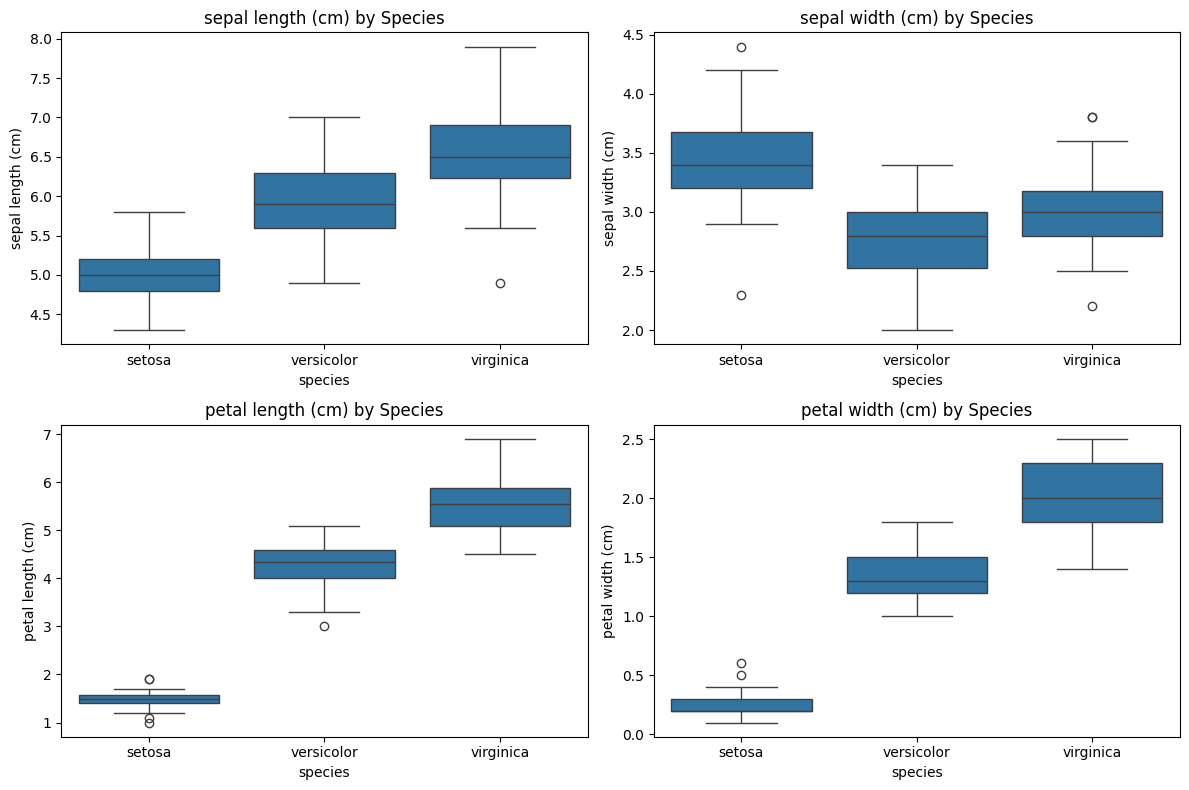

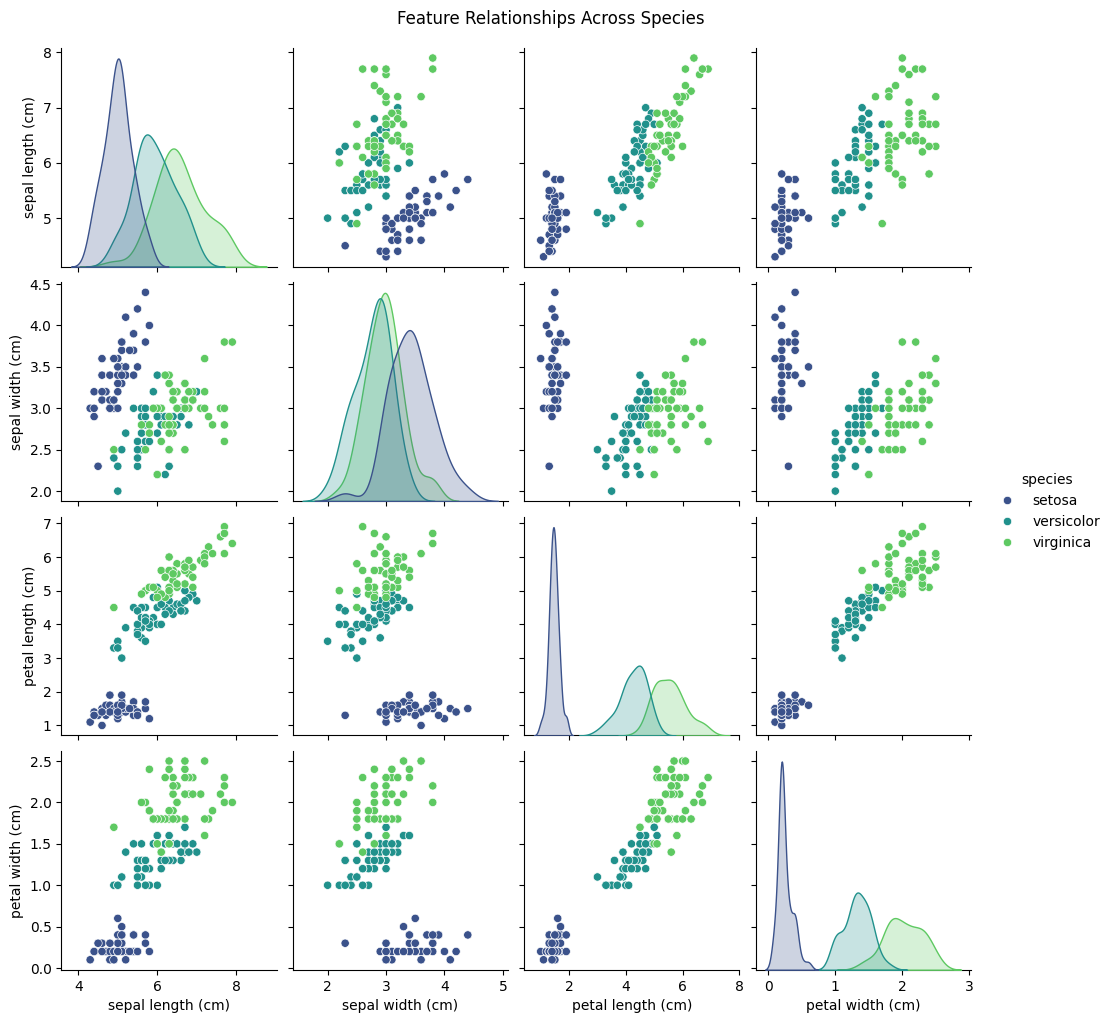

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



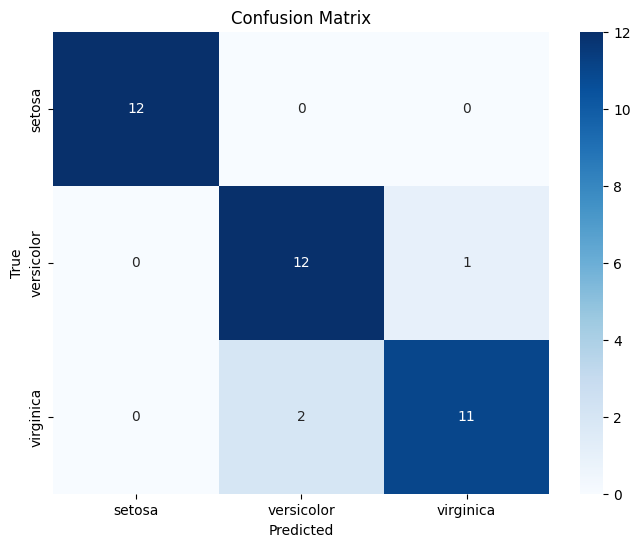

ValueError: X has 2 features, but LogisticRegression is expecting 4 features as input.

<Figure size 1000x800 with 0 Axes>

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# Load the Iris dataset (real-world botanical data)
iris = load_iris()
X = iris.data  # Flower measurements: sepal length/width, petal length/width
y = iris.target  # Flower species (0=setosa, 1=versicolor, 2=virginica)
feature_names = iris.feature_names
target_names = iris.target_names

# Create DataFrame for exploration
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

# Data Exploration
print("="*50)
print("Dataset Overview:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target classes: {target_names.tolist()}")
print("\nFeature Statistics:")
print(df.describe())

print("\nClass Distribution:")
print(df['species'].value_counts())

# Visualize feature distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

# Visualize feature relationships
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle('Feature Relationships Across Species', y=1.02)
plt.show()

# Preprocess data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model (Logistic Regression)
model = LogisticRegression(multi_class='multinomial', max_iter=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("="*50)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Decision boundary visualization (using first two features)
plt.figure(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(
    model,
    X_train_scaled[:, :2],
    cmap=plt.cm.Paired,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    eps=0.5,
    alpha=0.3
)
# Plot training points
for i, color in zip([0,1,2], ['red', 'blue', 'green']):
    plt.scatter(
        X_train_scaled[y_train == i, 0],
        X_train_scaled[y_train == i, 1],
        c=color,
        label=target_names[i],
        edgecolor="black",
        s=50
    )
plt.title('Decision Boundaries (Sepal Features Only)')
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.legend()
plt.show()

# Feature importance analysis
coef = model.coef_
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.barh(feature_names, coef[i], alpha=0.7, label=target_names[i])
plt.title('Feature Importance by Species')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend()
plt.tight_layout()
plt.show()

# Make sample prediction
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Setosa characteristics
sample_scaled = scaler.transform(sample)
pred_proba = model.predict_proba(sample_scaled)[0]
pred_class = model.predict(sample_scaled)[0]

print("="*50)
print("Sample Prediction:")
print(f"Input: {sample[0].tolist()}")
print(f"Predicted species: {target_names[pred_class]}")
print("Prediction probabilities:")
for i, prob in enumerate(pred_proba):
    print(f"  {target_names[i]}: {prob:.4f}")